In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# read in the data
df = pd.read_csv('data.csv')
df.head(20)

,Implementation,Timings [s],Block Size,Utilization [%],FLOPS
0,Serial,57.459,0x0,0.00,NaN
1,Unified Memory,3.114,8x8,58.83,8602580.0
2,Unified Memory,3.285,16x32,NaN,NaN
3,Unified Memory,3.665,32x16,NaN,NaN
4,Unified Memory,3.909,32x32,NaN,NaN
5,Standard Memory,2.372,8x8,59.07,8602710.0
6,Standard Memory,3.661,16x32,NaN,NaN
7,Standard Memory,3.087,32x16,NaN,NaN
8,Standard Memory,3.336,32x32,NaN,NaN
9,Tiled (no halo),1.510,8x8,98.42,7533100.0


In [164]:
# print column names
print(df.columns)
df.dtypes

Index(['Implementation', 'Timings [s]', 'Block Size', 'Utilization [%]',
       'FLOPS'],
      dtype='object')


Implementation      object
Timings [s]        float64
Block Size          object
Utilization [%]    float64
FLOPS              float64
dtype: object

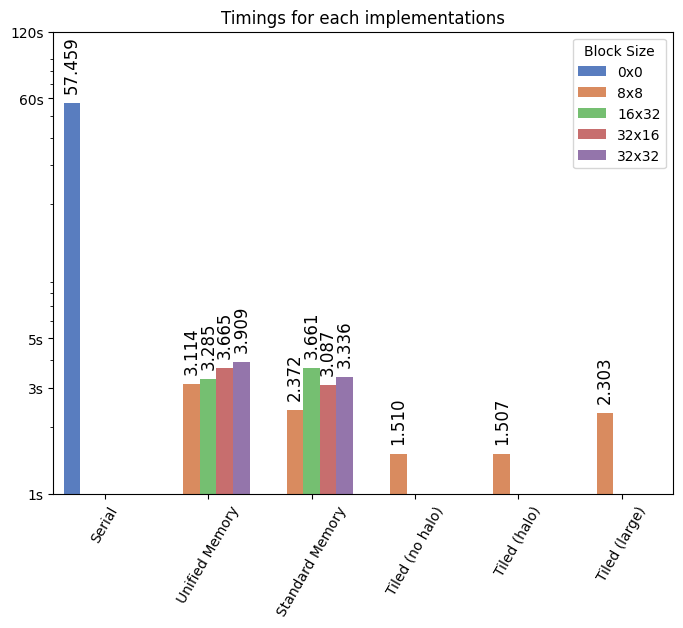

In [165]:
# plot the data using seaborn with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Implementation', y='Timings [s]', data=df, hue='Block Size', palette='muted')

# hide the axis legends
plt.xlabel('')
plt.ylabel('')

plt.title('Timings for each implementations')

# log scale the y-axis
plt.yscale('log')

# tilt the x-axis labels
plt.xticks(rotation=60)
plt.yticks([1,3,5,60,120], ['1s', '3s', '5s', '60s', '120s'])

# show the values on top of the bars with a slight offset
for p in plt.gca().patches:
	plt.gca().annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
					   ha='center', fontsize=12, color='black', xytext=(0, 10),
					   textcoords='offset points', rotation=90)

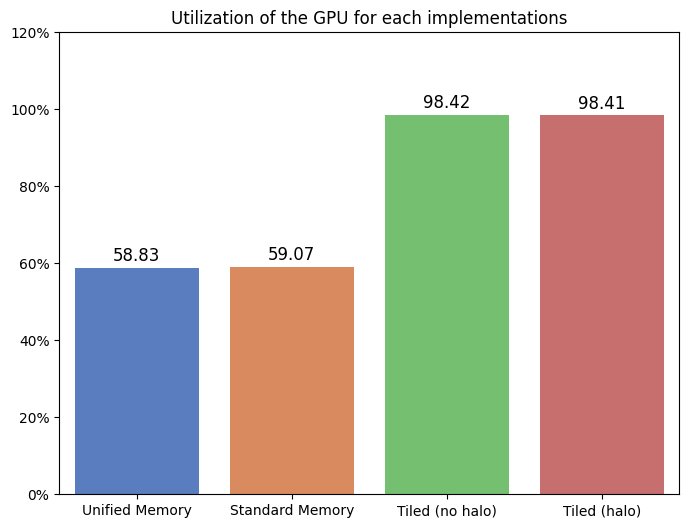

In [166]:
# plot the utilization of the GPU in a separate plot
plt.figure(figsize=(8, 6))

# plot the data using seaborn with a bar plot
sns.barplot(x='Implementation', y='Utilization [%]', hue='Implementation', data=df.dropna(), palette='muted')

# hide the axis legends
plt.xlabel('')
plt.ylabel('')

plt.yticks([0, 20, 40, 60, 80, 100, 120], ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])

plt.title('Utilization of the GPU for each implementations')

# show the values on top of the bars with a slight offset
for p in plt.gca().patches:
	plt.gca().annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
					   ha='center', fontsize=12, color='black', xytext=(0, 5),
					   textcoords='offset points')

In [167]:
# compute the speedup compared to the serial implementation
speedup = df[df['Implementation'] == 'Serial']['Timings [s]'].values[0] / df['Timings [s]']
df['Speedup'] = speedup
df

,Implementation,Timings [s],Block Size,Utilization [%],FLOPS,Speedup
0,Serial,57.459,0x0,0.00,NaN,1.000000
1,Unified Memory,3.114,8x8,58.83,8602580.0,18.451830
2,Unified Memory,3.285,16x32,NaN,NaN,17.491324
3,Unified Memory,3.665,32x16,NaN,NaN,15.677763
4,Unified Memory,3.909,32x32,NaN,NaN,14.699156
5,Standard Memory,2.372,8x8,59.07,8602710.0,24.223862
6,Standard Memory,3.661,16x32,NaN,NaN,15.694892
7,Standard Memory,3.087,32x16,NaN,NaN,18.613217
8,Standard Memory,3.336,32x32,NaN,NaN,17.223921
9,Tiled (no halo),1.510,8x8,98.42,7533100.0,38.052318


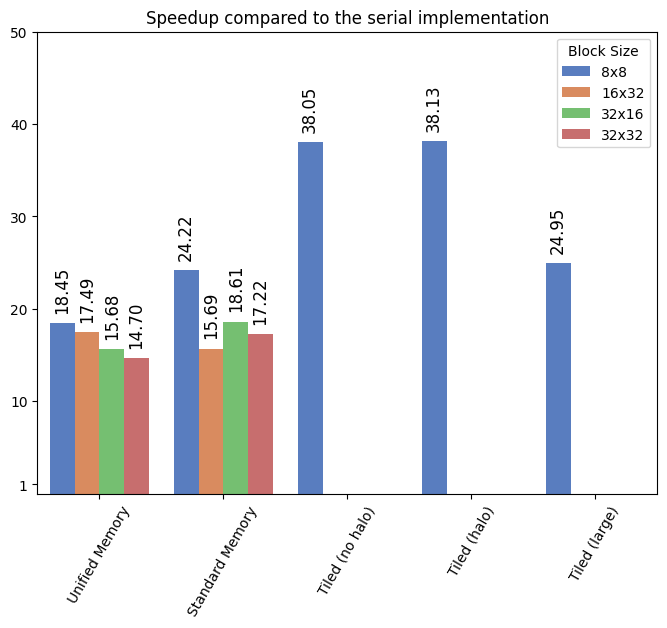

In [195]:
# plot the speedup
plt.figure(figsize=(8, 6))
sns.barplot(x='Implementation', y='Speedup', data=df[df['Implementation'] != 'Serial'], palette='muted', legend=True, hue='Block Size')

# hide the axis legends
plt.xlabel('')
plt.ylabel('')

plt.title('Speedup compared to the serial implementation')

plt.xticks(rotation=60)
plt.yticks([1, 10, 20, 30, 40, 50],[1, 10, 20, 30, 40, 50])

# show the values on top of the bars with a slight offset
for p in plt.gca().patches:
	if(p.get_height() > 1):
		plt.gca().annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
					   ha='center', fontsize=12, color='black', xytext=(0, 10),
					   textcoords='offset points', rotation=90)